In [1]:
!pip install pymaxflow

import cv2
import numpy as np
import maxflow

import matplotlib.pyplot as plt

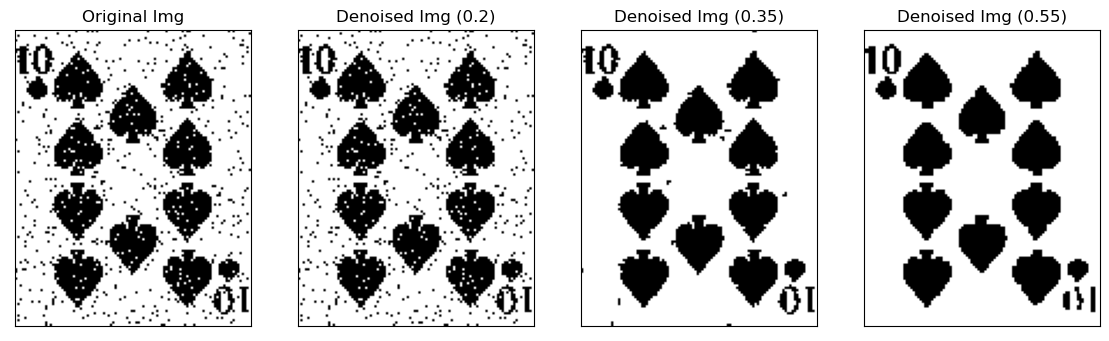

In [2]:
def question_3(img, rho=0.7, pairwise_cost_same=0.005, pairwise_cost_diff=0.2):
    # 1) Define Graph
    g = maxflow.Graph[float]()

    # 2) Add pixels as nodes
    nodeids = g.add_grid_nodes(img.shape)

    # 3) Compute Unary cost
    rho = 0.7
    zcost = -np.log(rho**img * (1-rho)**(1-img))
    g.add_grid_edges(nodeids, pairwise_cost_diff)

    # 4) Add terminal edges
    g.add_grid_tedges(nodeids, img, 1-img)


    # 6) Maxflow
    g.maxflow()

    sgm = g.get_grid_segments(nodeids)
    img2 = np.int_(np.logical_not(sgm))

    return img2

_, ax = plt.subplots(1, 4, figsize=(14, 8))
img = cv2.imread('./images/noise.png', cv2.IMREAD_GRAYSCALE)

# question_3(img, rho=0.7, pairwise_cost_same=0.005, pairwise_cost_diff=0.2)

ax[0].set_title("Original Img")
ax[0].imshow(img, norm=None, cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])

pairwise_cost_diffs = [0.2,0.35,0.55]

i = 1
for pairwise_cost_diff in pairwise_cost_diffs:
    img = question_3(img, rho=0.7, pairwise_cost_same=0.005, pairwise_cost_diff=pairwise_cost_diff)
    ax[i].set_title("Denoised Img ("+str(pairwise_cost_diff)+")")
    ax[i].imshow(img, norm=None, cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    i+=1

In [5]:
def question_4(img, rho=0.05):
    labels = np.unique(img).tolist()

    denoised_img = np.zeros_like(img)
    # Use Alpha expansion binary image for each label

    # 1) Define Graph

    # 2) Add pixels as nodes

    # 3) Compute Unary cost

    # 4) Add terminal edges

    # 5) Add Node edges

    # 6) Maxflow

    # Do not use the close button on image window to close, instead press enter (or any other key) to close windows.
    cv2.imshow('Original Img', img)
    cv2.imshow('Denoised Img', denoised_img), cv2.waitKey(0), cv2.destroyAllWindows()

image_q4 = cv2.imread('./images/noise2.png', cv2.IMREAD_GRAYSCALE)

# Call solution for question 4,
# depending on your implementation you may need to change the value of rho
question_4(image_q4, rho=0.04)

